In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import itertools
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [16]:
data = pd.read_csv('gini_income_crime_avs.csv')

In [24]:
data.head()

,State,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_white_poverty,share_non_white,share_voters_voted_trump,share_hate_crimes_per_pop
0,Alabama,0.47534,57249.0,0.060,0.64,0.821,0.12,0.35,0.63,0.000007
1,Alaska,0.41648,85900.6,0.064,0.63,0.914,0.06,0.42,0.53,0.000010
2,Arizona,0.46444,61933.6,0.063,0.90,0.842,0.09,0.49,0.50,0.000034
3,Arkansas,0.46898,53459.4,0.052,0.69,0.824,0.12,0.26,0.60,0.000004
4,California,0.48464,74437.2,0.059,0.97,0.806,0.09,0.61,0.33,0.000024


In [20]:
# #preprocessing
data.columns = [col.replace(' ', '_') for col in data.columns]
for col in x_cols:
    data[col] = (data[col] - data[col].mean())/data[col].std()
data

KeyError: 'mean_medians'

In [44]:
#kf = KFold(n_splits=3, shuffle=True)

In [25]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

#problems: r2 low

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     share_hate_crimes_per_pop   R-squared:                       0.491
Model:                                   OLS   Adj. R-squared:                  0.419
Method:                        Least Squares   F-statistic:                     6.901
Date:                       Thu, 16 Jan 2020   Prob (F-statistic):           3.52e-05
Time:                               14:06:45   Log-Likelihood:                 474.15
No. Observations:                         50   AIC:                            -934.3
Df Residuals:                             43   BIC:                            -920.9
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0002      0.000     -1.907      0.063      -0.000    1.11e-05
mean_gini                     0.0005      0.000      2.735      0.009       0.000       0.001
mean_medians               4.561e-10   4.69e-10      0.973      0.336   -4.89e-10     1.4e-09
share_unemployed_seasonal     0.0003      0.000      0.669      0.507      -0.001       0.001
share_white_poverty        5.903e-05      0.000      0.290      0.773      -0.000       0.000
share_non_white           -6.095e-05   2.94e-05     -2.073      0.044      -0.000   -1.65e-06
share_voters_voted_trump     -0.0001   3.89e-05     -2.689      0.010      -0.000   -2.61e-05
==============================================================================
Omnibus:                       25.786   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.057
Skew:                           1.351   Prob(JB):                     7.47e-15
Kurtosis:                       7.892   Cond. No.                     9.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('mean_gini', 317.3745751076776),
 ('mean_medians', 89.48202239444024),
 ('share_unemployed_seasonal', 39.12122645953273),
 ('share_white_poverty', 40.91843226276844),
 ('share_non_white', 8.259896812240566),
 ('share_voters_voted_trump', 29.070727243486413)]

In [30]:
#remove 'share_population_with_high_school_degree', VIF >5
outcome = 'share_hate_crimes_per_pop'
x_cols = ['mean_gini', 'mean_medians', 'share_unemployed_seasonal', 'share_white_poverty', 'share_non_white', 'share_voters_voted_trump']

In [31]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     share_hate_crimes_per_pop   R-squared:                       0.491
Model:                                   OLS   Adj. R-squared:                  0.419
Method:                        Least Squares   F-statistic:                     6.901
Date:                       Thu, 16 Jan 2020   Prob (F-statistic):           3.52e-05
Time:                               14:11:47   Log-Likelihood:                 474.15
No. Observations:                         50   AIC:                            -934.3
Df Residuals:                             43   BIC:                            -920.9
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0002      0.000     -1.907      0.063      -0.000    1.11e-05
mean_gini                     0.0005      0.000      2.735      0.009       0.000       0.001
mean_medians               4.561e-10   4.69e-10      0.973      0.336   -4.89e-10     1.4e-09
share_unemployed_seasonal     0.0003      0.000      0.669      0.507      -0.001       0.001
share_white_poverty        5.903e-05      0.000      0.290      0.773      -0.000       0.000
share_non_white           -6.095e-05   2.94e-05     -2.073      0.044      -0.000   -1.65e-06
share_voters_voted_trump     -0.0001   3.89e-05     -2.689      0.010      -0.000   -2.61e-05
==============================================================================
Omnibus:                       25.786   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.057
Skew:                           1.351   Prob(JB):                     7.47e-15
Kurtosis:                       7.892   Cond. No.                     9.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

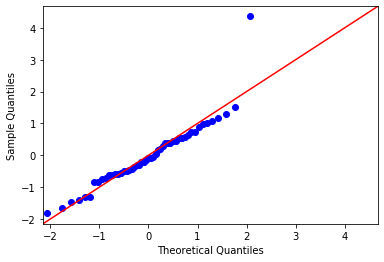

In [36]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
#some violations to the model but overall an okay fit

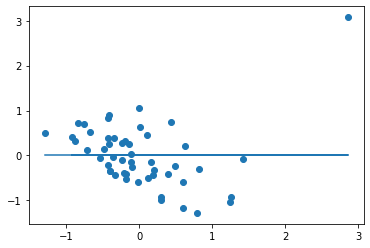

In [39]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))])

#outliers displaying disproportionate errors, consider removing outliers

In [ ]:
#remove

# Redo VIF/OLS on Splits